In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df = pd.read_csv(url)

# EDA

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

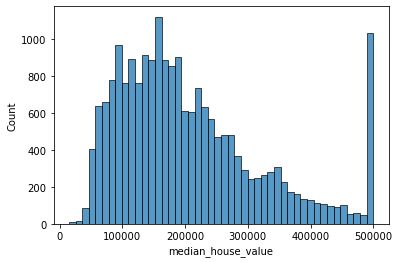

In [3]:
sns.histplot(df.median_house_value)

In [4]:
df.drop(columns={'ocean_proximity'}, inplace=True)

# Question 1

In [5]:
df.isnull().values.sum()

207

# Question 2

In [6]:
df['population'].median()

1166.0

# Question 3

In [7]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [8]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [9]:
df_train1 = df_train.copy()
df_train2 = df_train.copy()
df_train3 = df_train.copy()

In [10]:
# Functions

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


base = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
]

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

# 1st Model with fill 0

In [11]:
print("na sum befor = ",df_train1['total_bedrooms'].isna().sum())
df_train1['total_bedrooms'] = df_train1['total_bedrooms'].fillna(0)
print("na sum after = ",df_train1['total_bedrooms'].isna().sum())

na sum befor =  122
na sum after =  0


In [12]:
X_train1 = df_train1.fillna(0).values

w0_1, w_1 = train_linear_regression(X_train1, y_train)

y_pred_1 = w0_1 + X_train1.dot(w_1)

In [13]:
w0_1, y_pred_1

(-11.806729360745713,
 array([12.22360111, 11.62008878, 11.77605128, ..., 12.76594526,
        12.47813121, 12.51826893]))

<AxesSubplot:ylabel='Count'>

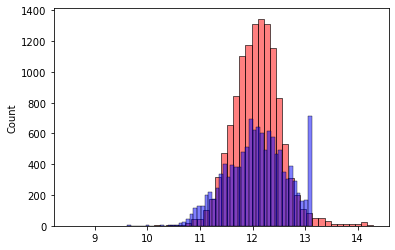

In [14]:
sns.histplot(y_pred_1, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [15]:
round(rmse(y_train, y_pred_1),2)

0.34

In [16]:
X_val = prepare_X(df_val)
y_pred_11 = w0_1 + X_val.dot(w_1)
round(rmse(y_val, y_pred_11),2)

0.65

# 2nd Model with fill with Mean

In [17]:
print("2nd Methode na sum befor = ",df_train2['total_bedrooms'].isna().sum())
df_train2['total_bedrooms'] = df_train2['total_bedrooms'].fillna(df_train2['total_bedrooms'].mean())
print("2nd Methode na sum after = ",df_train2['total_bedrooms'].isna().sum())

2nd Methode na sum befor =  122
2nd Methode na sum after =  0


In [18]:
X_train2 = df_train2.fillna(df_train2['total_bedrooms'].mean()).values

w0_2, w_2 = train_linear_regression(X_train2, y_train)

y_pred_2 = w0_2 + X_train2.dot(w_2)

In [19]:
w0_2, y_pred_2

(-11.872643362584729,
 array([12.34315564, 11.61397983, 11.77560196, ..., 12.76518673,
        12.47748319, 12.51572246]))

<AxesSubplot:ylabel='Count'>

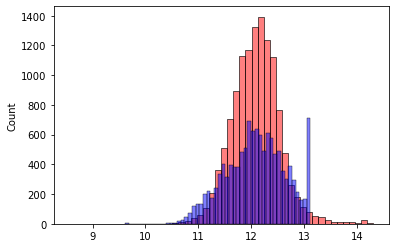

In [20]:
sns.histplot(y_pred_2, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [21]:
round(rmse(y_train, y_pred_2),2)

0.34

In [22]:
X_val = prepare_X(df_val)
y_pred_22 = w0_2 + X_val.dot(w_2)
round(rmse(y_val, y_pred_22),2)

0.61

# Question 4

In [23]:
df_train3['total_bedrooms'] = df_train3['total_bedrooms'].fillna(0)
df_train3.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [24]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [25]:
X_train3 = prepare_X(df_train3)
# 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10
#  r= 0
w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.33

# OR this methode

In [26]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train3 = prepare_X(df_train3)
    w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=r)

    X_val_3 = prepare_X(df_val)
    y_pred_3 = w0_3 + X_val_3.dot(w_3)
    score = rmse(y_val, y_pred_3)

    print(r, w0_3, score)

0 -11.806729360745178 0.33209123188346257
1e-06 -11.806713628118763 0.33209123175145744
0.0001 -11.805156321935051 0.33209121891466525
0.001 -11.79101780587611 0.33209112209778147
0.01 -11.651472788336962 0.3320920745128277
0.1 -10.418426512850944 0.3322510275033154
1 -5.06087581819456 0.3360597830148623
5 -1.5386307849509446 0.34126133493108896
10 -0.8216708327044318 0.342575484925636


the best r are : # **r= 0** with rmse = **0.33209123188346257**

# Question 5

In [27]:
rmse_scores =[]

In [28]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    # fillna with 0
    df_train = df_train.fillna(0)

    # train
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    # validate
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)


    # rmse
    score = round(np.sqrt(mean_squared_error(y_val, y_pred)),2)
    rmse_scores.append(score)

    print('Seed=  {} , Rmse score = {}'.format(s,score))

Seed=  0 , Rmse score = 0.35
Seed=  1 , Rmse score = 0.35
Seed=  2 , Rmse score = 0.35
Seed=  3 , Rmse score = 0.33
Seed=  4 , Rmse score = 0.34
Seed=  5 , Rmse score = 0.34
Seed=  6 , Rmse score = 0.34
Seed=  7 , Rmse score = 0.33
Seed=  8 , Rmse score = 0.34
Seed=  9 , Rmse score = 0.34


In [29]:
rmse_scores

[0.35, 0.35, 0.35, 0.33, 0.34, 0.34, 0.34, 0.33, 0.34, 0.34]

In [30]:
std = np.std(rmse_scores)
print(' STD of RMSE Scores = {}'.format(round(std,3)))

 STD of RMSE Scores = 0.007


# Question 6

In [31]:
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.fillna(0)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [32]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

In [33]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [45]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score,2)

0.34